Javier Díaz Machado 24_25


In [1]:
# importación de datos
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.33, random_state=1)
print(ytrain.shape)

(230,)


In [3]:
# 1. elegimos clasificador
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
# 2. instanciamos el modelo
model = BernoulliNB()
label_encoder = LabelEncoder()
print(model.__class__.__name__)
for column in Xtrain.columns:
	Xtrain[column] = label_encoder.fit_transform(Xtrain[column])
	# Apply label encoding to each column in Xtrain
for column in Xtest.columns:
	Xtest[column] = label_encoder.fit_transform(Xtest[column])
	# Now you can fit your model
model.fit(Xtrain, ytrain)

BernoulliNB


BernoulliNB()

In [4]:
model.class_count_ # Muestra el núemro de ejemplares/valores para cada una de las clases

array([102.,  45.,  83.])

In [5]:
model.classes_
especies = model.classes_.tolist() #guardamos las especies en una lista
print(especies)

['Adelie', 'Chinstrap', 'Gentoo']


In [6]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)

In [7]:
# 5 evaluación
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo

0.6754385964912281

In [8]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adeante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe   -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray     -> Los valores calcuylados de las clases después de realizar la predicción
# class  : ndarray     -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [9]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(especies,[0, 1, 2], inplace=True)
ytest_df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10152\4047570467.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ytest_df['species'].replace(especies,[0, 1, 2], inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10152\4047570467.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df

,species
306,2
341,2
291,2
102,0
289,2
...,...
17,0
257,2
224,2
88,0


In [10]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(especies,[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10152\3688707531.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_model_df['species'].replace(especies,[0, 1, 2], inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10152\3688707531.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_mode

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 0], dtype=int64)

Confusion matrix, without normalization
[[36  0 14]
 [23  0  0]
 [ 0  0 41]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

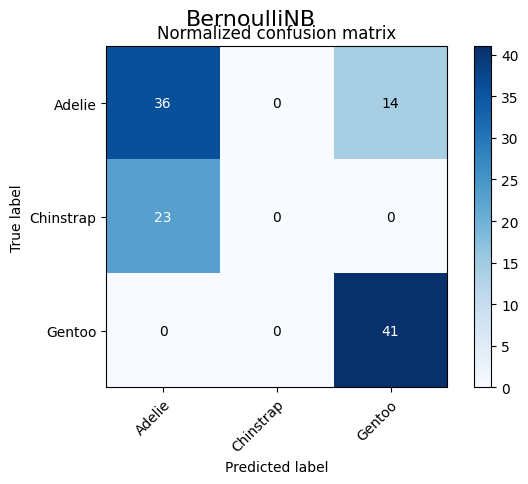

In [11]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(especies)
plot_confusion_matrix(
    ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup=model.__class__.__name__)